## File Operation

In [1]:
# r:read, w:write, a:append, b:binary
fid = open('test.txt', 'w')
fid.write('Hello\nWorld')
fid.close()

In [2]:
with open('test.txt', 'w') as f:
  f.write('Hello\nWorld')

In [4]:
a = '    123    '
a.strip()

'123'

In [5]:
with open('test.txt', 'r') as fid:
  for line in fid:
    print(line.strip())

Hello
World


In [6]:
with open('test.txt', 'r') as fid:
  s = fid.read()

In [7]:
s

'Hello\nWorld'

In [8]:
k = 0 
with open('test.txt', 'r') as fid:
  for line in fid:
    k = k+1
k

2

In [9]:
ary = []
with open('test.txt', 'r') as fid:
  for line in fid:
    ary.append(line)
ary

['Hello\n', 'World']

In [10]:
len(ary)

2

In [11]:
[line for line in open('test.txt', 'r')]

['Hello\n', 'World']

In [12]:
len([line for line in open('test.txt', 'r')])

2

In [13]:
customers = ['c001', 'c002', 'i001', 'i003', 'a004']
mylist = []
for person in customers:
  if person.startswith('c'):
    mylist.append(person.upper())
mylist

['C001', 'C002']

In [14]:
[person.upper() for person in customers if person.startswith('c')]

['C001', 'C002']

## Word Count

In [15]:
! wget https://raw.githubusercontent.com/ywchiu/esunpy/master/data/trump.txt

--2020-08-18 01:31:53--  https://raw.githubusercontent.com/ywchiu/esunpy/master/data/trump.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8736 (8.5K) [text/plain]
Saving to: ‘trump.txt’

trump.txt           100%[===================>]   8.53K  --.-KB/s    in 0s      

2020-08-18 01:31:53 (86.0 MB/s) - ‘trump.txt’ saved [8736/8736]



In [47]:
stopwords = ['¡v','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now']

In [48]:
with open('trump.txt', 'r', encoding='latin1') as f:
  speech = f.read()

### Method 1

In [49]:
words = speech.lower().split()

In [50]:
a = [1,1,3,3,5,2,1]
dic = {}
for e in a:
  if e not in dic:
    dic[e] = 1
  else:
    dic[e] = dic[e] +1 
dic

{1: 3, 2: 1, 3: 2, 5: 1}

In [51]:
a.count(1)
for e in set(a):
  print(e, a.count(e))

1 3
2 1
3 2
5 1


In [52]:
dic = {}
for word in words:
  if word not in stopwords:
    if word not in dic:
      dic[word] = 1
    else:
      dic[word] = dic[word] + 1

In [53]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)

In [54]:
for rec in swd[0:10]:
  print(rec)

('american', 11)
('america', 10)
('again.', 8)
('every', 7)
('one', 7)
('president', 6)
('people', 6)
('great', 6)
('country', 6)
('back', 6)


In [55]:
for k,v in swd[0:10]:
  print(k,v)

american 11
america 10
again. 8
every 7
one 7
president 6
people 6
great 6
country 6
back 6


### Method 2

In [56]:
dic = {}
for word in words:
  if word not in stopwords:
    dic[word] = dic.get(word,0) + 1

In [57]:
swd = sorted(dic.items(), key = lambda e: e[1], reverse=True)

In [58]:
for k,v in swd[0:10]:
  print(k,v)

american 11
america 10
again. 8
every 7
one 7
president 6
people 6
great 6
country 6
back 6


### Method 3
- https://docs.python.org/zh-tw/3/library/collections.html

In [60]:
from collections import Counter
a = [1,1,3,3,5,2,1]
c = Counter(a)
c.most_common(3)

[(1, 3), (3, 2), (5, 1)]

In [61]:
c = Counter([word for word in words if word not in stopwords])
c.most_common(10)

[('american', 11),
 ('america', 10),
 ('again.', 8),
 ('every', 7),
 ('one', 7),
 ('president', 6),
 ('people', 6),
 ('great', 6),
 ('country', 6),
 ('back', 6)]

## Method

In [63]:
import math
11.63
math.ceil(11.63)

12

In [64]:
help(math)

Help on built-in module math:

NAME
    math

DESCRIPTION
    This module is always available.  It provides access to the
    mathematical functions defined by the C standard.

FUNCTIONS
    acos(...)
        acos(x)
        
        Return the arc cosine (measured in radians) of x.
    
    acosh(...)
        acosh(x)
        
        Return the inverse hyperbolic cosine of x.
    
    asin(...)
        asin(x)
        
        Return the arc sine (measured in radians) of x.
    
    asinh(...)
        asinh(x)
        
        Return the inverse hyperbolic sine of x.
    
    atan(...)
        atan(x)
        
        Return the arc tangent (measured in radians) of x.
    
    atan2(...)
        atan2(y, x)
        
        Return the arc tangent (measured in radians) of y/x.
        Unlike atan(y/x), the signs of both x and y are considered.
    
    atanh(...)
        atanh(x)
        
        Return the inverse hyperbolic tangent of x.
    
    ceil(...)
        ceil(x)
        
 

In [65]:
dir(math)

['__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh',
 'atan',
 'atan2',
 'atanh',
 'ceil',
 'copysign',
 'cos',
 'cosh',
 'degrees',
 'e',
 'erf',
 'erfc',
 'exp',
 'expm1',
 'fabs',
 'factorial',
 'floor',
 'fmod',
 'frexp',
 'fsum',
 'gamma',
 'gcd',
 'hypot',
 'inf',
 'isclose',
 'isfinite',
 'isinf',
 'isnan',
 'ldexp',
 'lgamma',
 'log',
 'log10',
 'log1p',
 'log2',
 'modf',
 'nan',
 'pi',
 'pow',
 'radians',
 'sin',
 'sinh',
 'sqrt',
 'tan',
 'tanh',
 'tau',
 'trunc']

In [66]:
?math.ceil

In [67]:
l = [1,2,3,4,5]
dir(l)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [68]:
help(l.count)

Help on built-in function count:

count(...) method of builtins.list instance
    L.count(value) -> integer -- return number of occurrences of value



In [69]:
?l.count

## Function

In [70]:
def say_hello():
  print('hello world')

In [71]:
say_hello()

hello world


In [72]:
def addNum(a,b):
  return a + b

In [73]:
addNum(3,5)

8

In [74]:
addNum('hello', 'world')

'helloworld'

In [75]:
addNum([1,2,3], [4,5,6])

[1, 2, 3, 4, 5, 6]

In [76]:
def addNum(a,b=3):
  return a + b

addNum(5)

8

In [77]:
def addall(x, *args):
  print(x, args)
  res = x
  for y in args:
    res = res + y
  return res 

addall(1,2,3,4,5)



1 (2, 3, 4, 5)


15

In [80]:
def make_two_lists(**kwargs):
  print(kwargs)
  keys = kwargs.keys()
  values = kwargs.values()
  return [list(keys), list(values)]

make_two_lists(david='M' ,Mary='F',John='M')

{'david': 'M', 'Mary': 'F', 'John': 'M'}


[['david', 'Mary', 'John'], ['M', 'F', 'M']]

### Practice

In [81]:
a = '''1:壹, 2:貳, 3:參, 4:肆, 5:伍, 6:陸, 7:柒, 8:捌, 9:玖'''

In [87]:
dic = {}
for ele in a.split(','):
  k,v = ele.strip().split(':')
  dic[k] = v

In [88]:
dic

{'1': '壹',
 '2': '貳',
 '3': '參',
 '4': '肆',
 '5': '伍',
 '6': '陸',
 '7': '柒',
 '8': '捌',
 '9': '玖'}

In [93]:
dic = {'1': '壹',
 '2': '貳',
 '3': '參',
 '4': '肆',
 '5': '伍',
 '6': '陸',
 '7': '柒',
 '8': '捌',
 '9': '玖',
 '0': '零'}

In [94]:
s = 16800
for e in str(s):
  print(dic.get(e))

壹
陸
捌
零
零


In [95]:
def numberConvert(n):
  s = ''
  for e in str(n):
    s += dic.get(e)
  return s

In [96]:
numberConvert(948794)

'玖肆捌柒玖肆'

In [97]:
def numberConvert2(n):
  s = []
  for e in str(n):
    s.append(dic.get(e))
  return ''.join(s)
  
numberConvert2(55688)

'伍伍陸捌捌'

## Lambda

In [98]:
3 ** 2

9

In [100]:
def square(num):
  ret = num ** 2
  return ret

square(3)

9

In [101]:
def square(num):
  return num ** 2

square(3)

9

In [102]:
def square(num): return num ** 2

square(3)

9

In [103]:
square = lambda num : num ** 2

In [104]:
square(3)

9

In [105]:
lambda e: e[1]

<function __main__.<lambda>>

In [106]:
def getFirst(e):
  return e[1]

a = ('the', 7)
getFirst(a)

7

In [108]:
even = lambda e : e%2 ==0
even(4)

True

In [109]:
first =lambda s:s[0]
first('world')

'w'

In [110]:
rev=lambda s:s[::-1]
rev('hello')

'olleh'

In [111]:
adder =lambda x,y:x+y
adder(3,5)

8

## Nested Statement and Scope

In [113]:
x = 25

def printer():
  x = 50
  return x

print(x)
print(printer())
print(x)

25
50
25


In [115]:
x  = 10
f = lambda x : x * 2
f(3)

6

In [116]:
name = 'this is a global name'

In [119]:
#dir()

In [120]:
def greet():
  name = 'sammy'
  def hello():
    print('hello '+ name)
  hello()

greet()

hello sammy


In [121]:
print(name)

this is a global name


In [122]:
sum

<function sum>

In [123]:
sum([1,2,3,4,5])

15

In [125]:
sum(range(1,101))

5050

In [126]:
sum = 0

In [127]:
sum([1,2,3,4,5])

TypeError: ignored

In [128]:
del sum

In [129]:
sum([1,2,3])

6

In [130]:
x = 50

def func(x):
  print(x)
  x = 2
  print('change local x to :', x)
func(x)

50
change local x to : 2


In [131]:
print(x)

50


In [136]:
x = 50

def func():
  global x
  print(x)
  x = 2
  print('change local x to :', x)
func()

50
change local x to : 2


In [137]:
print(x)

2


## Try and Except

In [139]:
with open('123.txt', 'w') as f:
  f.write('123')

In [140]:
with open('123.txt', 'r') as f:
  f.write('123')

UnsupportedOperation: ignored

In [142]:
try:
  f = open('testfile','r')
  f.write('Test write this')
except IOError: #處理IOError
  print("Error: Could not find file or read data")
else:
  print("Content written successfully")
f.close()


Error: Could not find file or read data


In [146]:
dividend = input('Dividend:')
divisor  = input('Devisor')

float(dividend)/float(divisor)

Dividend:5
Devisor0


ZeroDivisionError: ignored

In [148]:
dividend = input('Dividend:')
divisor  = input('Devisor')

try:
  float(dividend)/float(divisor)
except ZeroDivisionError as detail:
  print('Zero Division Error',detail)

Dividend:qoo
Devisorpp[


ValueError: ignored

In [150]:
dividend = input('Dividend:')
divisor  = input('Devisor')

try:
  float(dividend)/float(divisor)
except:
  print('ERROR')

Dividend:5
Devisorqoo
ERROR


In [154]:
dividend = input('Dividend:')
divisor  = input('Devisor')

try:
  float(dividend)/float(divisor)
except ZeroDivisionError as detail: 
  print(detail)
except:
  print('ERROR')
else:
  print('if success, print')
finally:
  print('i am the last')

Dividend:5
Devisorqoo
ERROR
i am the last


### Practice

In [155]:
dic = {'1': '壹',
 '2': '貳',
 '3': '參',
 '4': '肆',
 '5': '伍',
 '6': '陸',
 '7': '柒',
 '8': '捌',
 '9': '玖',
 '0': '零'}

In [163]:
def numberConvert(n):
  s = ''
  try:
    for e in str(n):
      s += dic.get(e)
    return s
  except Exception as e:
    print(e)
    print('請輸入數字')
  

In [165]:
numberConvert('qoo')

must be str, not NoneType
請輸入數字


In [166]:
a = 3
a == 3

True

In [167]:
a == 4

False

In [168]:
assert a == 3

In [169]:
assert a == 4

AssertionError: ignored

In [170]:
def test(a):
  a = a + 1
  assert a == 3
  
test(2)

In [171]:
test(5)

AssertionError: ignored

## Object

In [172]:
type(1 )

int

In [173]:
dir(1 )

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']

In [174]:
a = 1
type(a)

int

In [175]:
a

1

In [176]:
id(a)

10914496

In [177]:
a = 1
b = 1

In [178]:
id(a)

10914496

In [179]:
id(b)

10914496

In [180]:
a = 2

In [181]:
id(a)

10914528

In [182]:
a = 'qoo'
a[1] = '2'

TypeError: ignored

In [183]:
a = [1,2,3]
aa = [1,2,3]


In [184]:
id(a)


139741974822152

In [185]:
id(aa)

139741974820616

In [186]:
a[1] = 200

In [187]:
id(a)

139741974822152

## Class

In [188]:
class Sample(object):
  pass

x = Sample()

In [189]:
type(x)

__main__.Sample

In [190]:
class Dog(object):
  def __init__(self, breed):
    self.breed = breed

sam = Dog(breed = 'Lab')
frank = Dog(breed = 'Huskie')


In [192]:
dir(sam)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'breed']

In [193]:
sam.breed

'Lab'

In [194]:
frank.breed

'Huskie'

In [195]:
class Dog(object):
  species = 'mammal'
  def __init__(self, breed, name):
    self.breed = breed
    self.name = name

sam = Dog('Lab', 'Sam')

In [196]:
dir(sam)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'breed',
 'name',
 'species']

In [197]:
sam.breed

'Lab'

In [198]:
sam.name

'Sam'

In [199]:
sam.species

'mammal'

In [200]:
dir(Dog)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'species']

In [201]:
Dog.species

'mammal'

## Method

In [203]:
class Circle(object):
  pi = 3.14
  def __init__(self, radius = 1):
    self.radius = radius
  def area(self):
    return Circle.pi * self.radius * self.radius
  def setRadius(self, radius):
    self.radius = radius
  def getRadius(self):
    return self.radius

In [204]:
c = Circle(radius = 1)

In [205]:
c.area()

3.14

In [206]:
c.setRadius(3)

In [207]:
c.getRadius()

3

In [208]:
c.area()

28.259999999999998

In [209]:
type(c)

__main__.Circle

In [210]:
dir(c)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'area',
 'getRadius',
 'pi',
 'radius',
 'setRadius']

## Inheritance

In [211]:
class Animal(object):
  def __init__(self):
    print('Animal Created')
  
  def whoAmI(self):
    print('Animal')

  def eat(self):
    print('Eating')

In [212]:
a = Animal()

Animal Created


In [213]:
a.whoAmI()

Animal


In [215]:
a.eat()

Eating


In [216]:
class Dog(Animal):
  def __init__(self):
    Animal.__init__(self)
    print('Dog Created')
  def whoAmI(self):
    print('Dog')
  def bark(self):
    print('Woof')
d= Dog()

Animal Created
Dog Created


In [217]:
d.eat()

Eating


In [218]:
d.whoAmI()

Dog


In [219]:
d.bark()

Woof


In [220]:
dir(Animal)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'eat',
 'whoAmI']

In [221]:
dir(Dog)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bark',
 'eat',
 'whoAmI']

## Special Method

In [235]:
class Book(object):
  def __init__(self, title, author, pages):
    print("A book is created")
    self.title = title
    self.author = author
    self.pages = pages
  def __str__(self):
    return "Title:%s , author:%s, pages:%s " %(self.title, self.author, self.pages)

  def __len__(self):
    return(self.pages)
    
  def __del__(self):
    print("A book is destroyed")
book = Book('Python rocks', 'Jose', 200)
#dir(book)

A book is created


In [236]:
len(book)

200

In [237]:
print(book)

Title:Python rocks , author:Jose, pages:200 


In [238]:
del book

A book is destroyed


In [239]:
print(book)

NameError: ignored

### Practice

In [248]:
class Robot(object):
  def __init__(self, age, gender):
    self.age = age
    self.gender = gender
    self.qa = {
      '保險':'以下是我們推薦的險總類',
      '貸款' :'以下是我們推薦的貸款總類',
      '餘額': '以下是您的銀行存款餘額',   
    }
  def getRobotAge(self):
    return self.age

  def getRobotGender(self):
    return self.gender

  def addQA(self, question, answer):
    self.qa[question] = answer
    
  def getMessage(self, question):
    for q in self.qa:
      if q in question:
        return self.qa.get(q)
        #break
    else:
      return '我現在還不聰明，等我變聰明後再告訴你'

In [249]:
e = Robot(10, 'M')
e.getRobotAge()

10

In [250]:
e.getRobotGender()

'M'

In [251]:
e.getMessage('我想要貸款')

'以下是我們推薦的貸款總類'

In [252]:
e.getMessage('早安')

'我現在還不聰明，等我變聰明後再告訴你'

In [253]:
e.addQA('早安', '妳也早安')

In [254]:
e.getMessage('早安')

'妳也早安'

In [255]:
dir(e)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'addQA',
 'age',
 'gender',
 'getMessage',
 'getRobotAge',
 'getRobotGender',
 'qa']

In [256]:
e.qa

{'保險': '以下是我們推薦的險總類', '早安': '妳也早安', '貸款': '以下是我們推薦的貸款總類', '餘額': '以下是您的銀行存款餘額'}

## Module

In [257]:
import math

In [258]:
import test

In [259]:
dir(test)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'func',
 'func2',
 'var']

In [260]:
test.var

3

In [261]:
test.func(5)

25

In [262]:
test.func2('David')

hello David


In [263]:
def func(a,b):
  return a + b

In [264]:
func(3,5)

8

In [265]:
from test import func

In [267]:
! cat test.py

var = 3

def func(x):
    return x ** 2

def func2(name):
    print('hello', name)

In [266]:
func(3,5)

TypeError: ignored

In [268]:
import test
test.func(3)

9

In [270]:
def func(a,b):
  return a + b

In [271]:
from test import func

In [272]:
from test import func as f
f(10)

100

In [273]:
from test import *

## Package

In [274]:
! mkdir child

In [275]:
! cp test.py child/

In [276]:
from child import test

In [277]:
test.func(5)

25

In [278]:
import child
child.test.func(5)

25

In [279]:
from child.test import func
func(5)

25

## Third Party Package

In [280]:
! pip install gTTS

  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=273c44d6319493c2ee78be4e671477329112f0842d0befb43bf18176db7377e1
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [281]:
! gtts-cli 'I love esun bank' --output hello.mp3

In [285]:
from gtts import gTTS
tts = gTTS('我愛玉山銀行', lang= 'zh-TW')
tts.save('hello3.mp3')

In [283]:
?gTTS

In [1]:
! pip install face-recognition

     |████████████████████████████████| 100.2MB 72kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=c755618a9349c810af071e83020e773321847cacccb017eb34adeb8607c055ea
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [2]:
! wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png

--2020-08-18 06:43:41--  https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png/220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79101 (77K) [image/png]
Saving to: ‘220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png’

220px-Chou_Tzuyu_at 100%[===================>]  77.25K  --.-KB/s    in 0.1s    

2020-08-18 06:43:41 (680 KB/s) - ‘220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png’ saved [79101/79101]



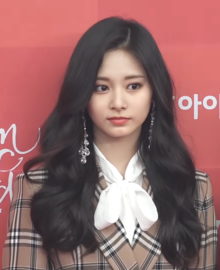

In [3]:
from PIL import Image
img = Image.open('220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png')
img

In [4]:
import face_recognition
image = face_recognition.load_image_file("220px-Chou_Tzuyu_at_the_Golden_Disc_Awards_2019.png")
face_locations = face_recognition.face_locations(image)

In [5]:
face_locations

[(63, 154, 138, 79)]

In [8]:
cropped = img.crop(face_locations[0])

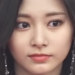

In [16]:
y0, x1, y1, x0 = face_locations[0]
cropped = img.crop((x0,y0,x1,y1))
cropped

### Practice

In [17]:
news = '''
迎戰數位金融時代，銀行服務朝「生態圈」發展，其中玉山銀行、台新銀行兩大「死對頭」
動作積極。玉山銀行強打「玉山Wallet」，開發信用卡支付、理財及消費通路一條龍功能；
台新從數位銀行出發創建「Richart Life」平台，建構台新Pay、台新Point系統。雙方宛如
「招財貓」對決「黑狗」，貓狗大戰激情開打。
'''

In [18]:
! pip install jieba

In [19]:
# encoding=utf-8
import jieba

jieba.enable_paddle()# 启动paddle模式。 0.40版之后开始支持，早期版本不支持
strs=["我来到北京清华大学","乒乓球拍卖完了","中国科学技术大学"]
for str in strs:
    seg_list = jieba.cut(str,use_paddle=True) # 使用paddle模式
    print("Paddle Mode: " + '/'.join(list(seg_list)))

seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式

Installing paddle-tiny, please wait a minute......
Paddle enabled successfully......
Building prefix dict from the default dictionary ...


Paddle Mode: 我/来到/北京清华大学
Paddle Mode: 乒乓球/拍卖/完/了
Paddle Mode: 中国科学技术大学


Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.853 seconds.
Prefix dict has been built successfully.


Full Mode: 我/ 来到/ 北京/ 清华/ 清华大学/ 华大/ 大学


In [20]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=False)
print("Default Mode: " + "/ ".join(seg_list))  # 精确模式

Default Mode: 我/ 来到/ 北京/ 清华大学


In [22]:
import jieba
jieba.add_word('生態圈')
seg_list = jieba.cut(news, cut_all=False)
print("Default Mode: " + "/ ".join(seg_list)) 

Default Mode: 
/ 迎戰/ 數位/ 金融/ 時代/ ，/ 銀行/ 服務朝/ 「/ 生態圈/ 」/ 發展/ ，/ 其中/ 玉山/ 銀行/ 、/ 台新/ 銀行/ 兩大/ 「/ 死/ 對頭/ 」/ 
/ 動作/ 積極/ 。/ 玉山/ 銀行強/ 打/ 「/ 玉山/ Wallet/ 」/ ，/ 開發/ 信用卡/ 支付/ 、/ 理財及/ 消費/ 通路/ 一條/ 龍/ 功能/ ；/ 
/ 台新/ 從/ 數位/ 銀行/ 出發/ 創建/ 「/ Richart/  / Life/ 」/ 平台/ ，/ 建構/ 台/ 新/ Pay/ 、/ 台新/ Point/ 系統/ 。/ 雙方/ 宛如/ 
/ 「/ 招財貓/ 」/ 對決/ 「/ 黑狗/ 」/ ，/ 貓狗大戰/ 激情/ 開打/ 。/ 



## Numpy

In [24]:
a = [1,3,5,7,9]
b = [2,4,6,8,10]
for i in range(len(a)):
  print(a[i] * b[i])

2
12
30
56
90


In [27]:
for rec in zip(a,b):
  print(rec)

(1, 2)
(3, 4)
(5, 6)
(7, 8)
(9, 10)


In [28]:
for i,j in zip(a,b):
  print(i*j)

2
12
30
56
90


In [29]:
import numpy as np
na = np.array(a)

In [30]:
a

[1, 3, 5, 7, 9]

In [31]:
type(a)

list

In [32]:
na

array([1, 3, 5, 7, 9])

In [33]:
type(na)

numpy.ndarray

In [34]:
na.append(11)

AttributeError: ignored

In [35]:
c = [1,3,5,'qoo']
np.array(c)

array(['1', '3', '5', 'qoo'], dtype='<U21')

In [37]:
na = np.array(a)
nb = np.array(b)

In [38]:
na * nb

array([ 2, 12, 30, 56, 90])

In [39]:
na + nb

array([ 3,  7, 11, 15, 19])

In [40]:
na / nb

array([0.5       , 0.75      , 0.83333333, 0.875     , 0.9       ])

In [41]:
na = np.array([1,2,3,4,5])

In [42]:
na[0]

1

In [43]:
na[-1]

5

In [44]:
na[1:3]

array([2, 3])

In [45]:
a = [1,2,3,4,5]
ary = []
for e in a:
  if e >=4:
    ary.append(e)
ary

[4, 5]

In [46]:
# pythonic
[e for e in a if e >= 4]

[4, 5]

In [47]:
na

array([1, 2, 3, 4, 5])

In [48]:
na >= 4

array([False, False, False,  True,  True])

In [49]:
na[na >= 4]

array([4, 5])

In [51]:
na[np.array([True, True, False, False, True])]

array([1, 2, 5])

In [52]:
na =np.array([[ 1,2,3,4,5], [6,7,8,9,10 ]])


In [53]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [54]:
na.shape

(2, 5)

In [55]:
na[0,0]

1

In [56]:
na[:,1]

array([2, 7])

In [57]:
na[0,:]

array([1, 2, 3, 4, 5])

In [58]:
na

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [59]:
na.T

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

In [60]:
arr=np.array([ 60 ,90 ,70 ,55 ,120 ,88 ,75 ])

In [61]:
arr.dtype

dtype('int64')

In [62]:
arr.max()

120

In [63]:
arr.min()

55

In [64]:
arr.argmax()

4

In [65]:
arr.argmin()

3

In [66]:
arr.sum()

558

In [67]:
arr.mean()

79.71428571428571

In [68]:
np.median(arr)

75.0

In [69]:
np.mean(arr)

79.71428571428571

In [70]:
np.sqrt(arr)

array([ 7.74596669,  9.48683298,  8.36660027,  7.41619849, 10.95445115,
        9.38083152,  8.66025404])

In [71]:
np.var(arr)

416.204081632653

In [73]:
(arr - arr.mean()) / np.std(arr)

array([-0.96633538,  0.50417498, -0.47616526, -1.21142044,  1.97468533,
        0.40614096, -0.2310802 ])

In [76]:
X =np.array([1,2])
W1 = np.random.randn(2,3)

In [79]:
O1 = np.dot(X,W1)

In [80]:
W2 = np.random.randn(3,2)

In [81]:
np.dot(O1, W2)

array([2.24728546, 0.15755527])

In [83]:
na = np.array([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
na


array([['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U5')

In [86]:
na[:,2].astype(int).mean()

26.833333333333332

In [87]:
na = np.array([['name', 'gender', 'age'],['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
na


array([['name', 'gender', 'age'],
       ['frank', 'M', '29'],
       ['mary', 'F', '23'],
       ['tom', 'M', '35'],
       ['ted', 'M', '33'],
       ['jean', 'F', '21'],
       ['lisa', 'F', '20']], dtype='<U6')

In [88]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])

In [89]:
df

,0,1,2
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [90]:
df.columns = ['name', 'gender', 'age']

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   gender  6 non-null      object
 2   age     6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [94]:
df['age'].mean()

26.833333333333332

In [95]:
labels = ['a', 'b', 'c']
my_list = [10,20,30]
pd.Series(my_list)

0    10
1    20
2    30
dtype: int64

In [96]:
pd.Series(data = my_list , index = labels)

a    10
b    20
c    30
dtype: int64

In [97]:
arr = np.array([10,20,30])
arr

array([10, 20, 30])

In [98]:
pd.Series(arr)

0    10
1    20
2    30
dtype: int64

In [99]:
pd.Series(arr, labels)

a    10
b    20
c    30
dtype: int64

In [100]:
s2 = pd.Series(arr, labels)

In [101]:
s2[0]

10

In [102]:
s2['a']

10

In [103]:
d={'a' :10 ,'b' :20 ,'c':30 }
pd.Series(d)

a    10
b    20
c    30
dtype: int64

In [104]:
import pandas as pd
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35],
['ted', 'M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]])
df.columns = ['name', 'gender', 'age']
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [105]:
df = pd.DataFrame([['frank', 'M', 29], ['mary', 'F', 23], ['tom', 'M', 35], ['ted','M', 33], ['jean', 'F', 21], ['lisa', 'F', 20]], columns = ['name', 'gender', 'age'])

In [107]:
df = pd.DataFrame([{'name':'frank','gender':'M', 'age':29}, 
{'name':'mary','gender':'F', 'age':23},
{'name':'tom','gender':'M', 'age':35}, 
{'name':'ted','gender':'M', 'age':33}, 
{'name':'jean','gender':'F', 'age':21}, 
{'name':'lisa','gender':'F', 'age':20}])

In [108]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [109]:
df.head(3)

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35


In [110]:
df.tail(3)

,name,gender,age
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    6 non-null      object
 1   gender  6 non-null      object
 2   age     6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [112]:
df.describe()

,age
count,6.000000
mean,26.833333
std,6.400521
min,20.000000
25%,21.500000
50%,26.000000
75%,32.000000
max,35.000000


In [113]:
df.dtypes

name      object
gender    object
age        int64
dtype: object

In [114]:
df

,name,gender,age
0,frank,M,29
1,mary,F,23
2,tom,M,35
3,ted,M,33
4,jean,F,21
5,lisa,F,20


In [117]:
df['gender'] == 'M'

0     True
1    False
2     True
3     True
4    False
5    False
Name: gender, dtype: bool

In [118]:
# select * from df where gender = 'M'
df[df['gender'] == 'M']

,name,gender,age
0,frank,M,29
2,tom,M,35
3,ted,M,33


In [119]:
# select name, age from df where gender = 'M'
df.loc[df['gender'] == 'M', ['name', 'age']]

,name,age
0,frank,29
2,tom,35
3,ted,33


In [120]:
# select gender, AVG(age) from df group by gender
df.groupby('gender')['age'].mean()

gender
F    21.333333
M    32.333333
Name: age, dtype: float64